In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings


#modeling series 
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
import seaborn as sns 

#
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from sklearn.preprocessing import StandardScaler, Normalizer

warnings.filterwarnings('ignore')

In [4]:
# Colors of teamplate graphs

COLOR_GRAPHS_BLUEVIOLET = 'blueviolet'
COLOR_GRAPHS_SLATEBLUE = 'slateblue'
COLOR_GRAPHS_GOLD = 'gold'
COLOR_GRAPHS_KHAKI = 'khaki'
COLOR_GRAPHS_BLACK = 'black'
COLOR_GRAPHS_LAVENDER = 'lavender'
COLOR_GRAPHS_ORANGERED = 'orangered'

In [5]:
from bcb import sgs

CODIGO_TRANSACOES_CORRENTES = 23461

#datetime
start_date = '2020-01-01'
end_date = '2025-12-31'

transacoes_correntes = sgs.get({'saldo': CODIGO_TRANSACOES_CORRENTES})

df_transaction = pd.DataFrame(transacoes_correntes)
df_yearly = df_transaction.resample('Y').last()

df_yearly['diff_year'] = df_yearly['saldo'].diff()
df_yearly['yy_change'] = df_yearly['diff_year'] / df_yearly['saldo'].shift(1)

#percentual variation 

df_yearly['pct_change (%)'] = df_yearly['yy_change'].pct_change() * 100
df_yearly['pct_change (%)'] = df_yearly['pct_change (%)'].__round__(2)

df_yearly

,saldo,diff_year,yy_change,pct_change (%)
Date,,,,
1995-12-31,-18712.4,NaN,NaN,NaN
1996-12-31,-23843.0,-5130.6,0.274182,NaN
1997-12-31,-32133.4,-8290.4,0.347708,26.82
1998-12-31,-34992.9,-2859.5,0.088988,-74.41
1999-12-31,-26783.6,8209.3,-0.234599,-363.63
2000-12-31,-26530.8,252.8,-0.009439,-95.98
2001-12-31,-24890.1,1640.7,-0.061841,555.20
2002-12-31,-9407.0,15483.1,-0.622059,905.89
2003-12-31,2193.2,11600.2,-1.233146,98.24


*Analisando Saldo do Brasil em Transações Correntes*

O gráfico ilustra a variação percentual dos anos (y/y) (Ano atual - Ano_anterior) / Ano_anterior
E também o volume de cada ano, com o saldo sendo em grande maioria negativo, mostrando todo o processo de transações correntes nas contas brasileiras

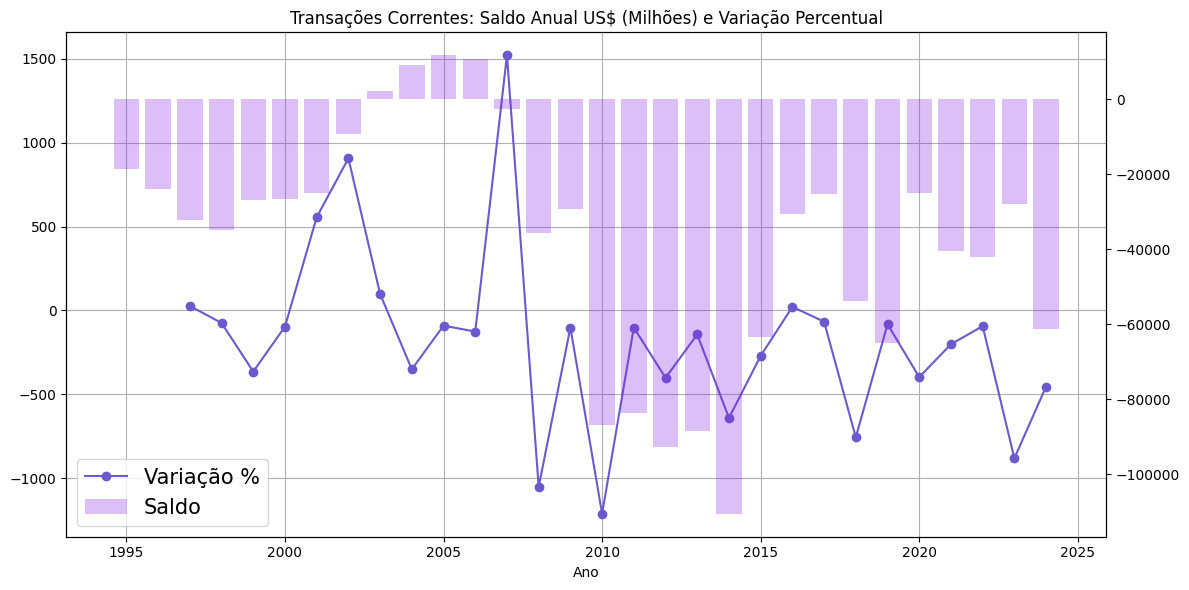

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_yearly.index.year, df_yearly['pct_change (%)'], marker='o', color=COLOR_GRAPHS_SLATEBLUE, label='Variação %')
ax1.set_xlabel('Ano')

ax2  = ax1.twinx()

ax2.bar(df_yearly.index.year, df_yearly['saldo'], alpha=0.3, color=COLOR_GRAPHS_BLUEVIOLET, label='Saldo')

plt.title('Transações Correntes: Saldo Anual US$ (Milhões) e Variação Percentual')
ax1.grid(True)

lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='lower left', fontsize=15)

plt.tight_layout()
plt.show()

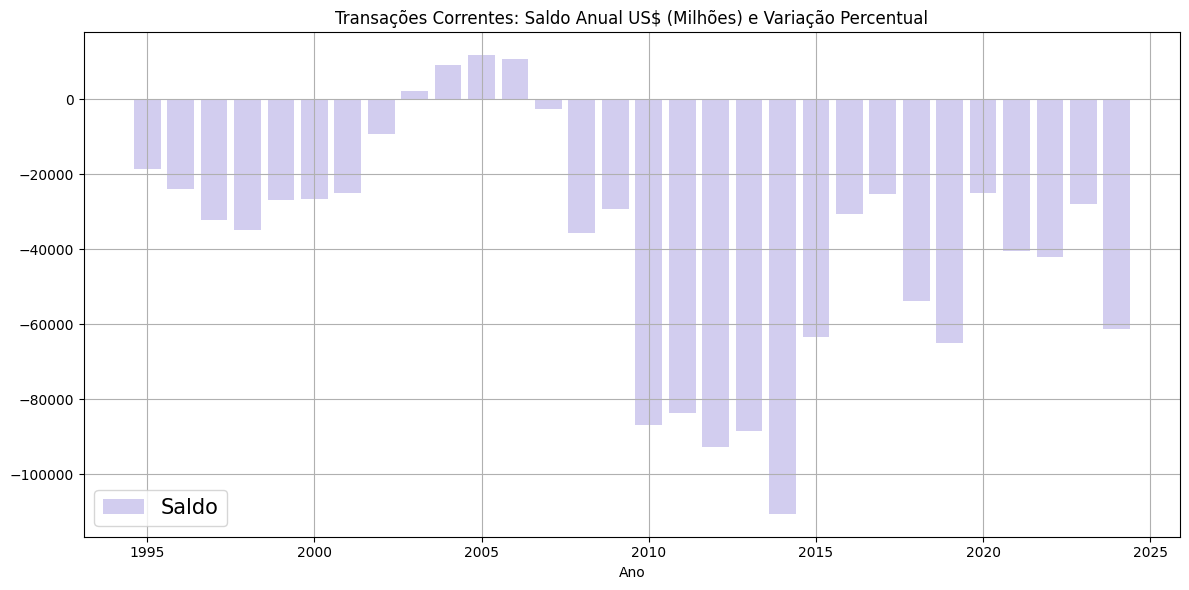

In [7]:
fig, ax2 = plt.subplots(figsize=(12, 6))

ax2.set_xlabel('Ano')

# Criação das barras
bars = ax2.bar(
    df_yearly.index.year,
    df_yearly['saldo'],
    alpha=0.3,
    color=COLOR_GRAPHS_SLATEBLUE,
    label='Saldo'
)
plt.title('Transações Correntes: Saldo Anual US$ (Milhões) e Variação Percentual')
ax2.grid(True)

# Legenda
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='lower left', fontsize=15)

plt.tight_layout()
plt.show()


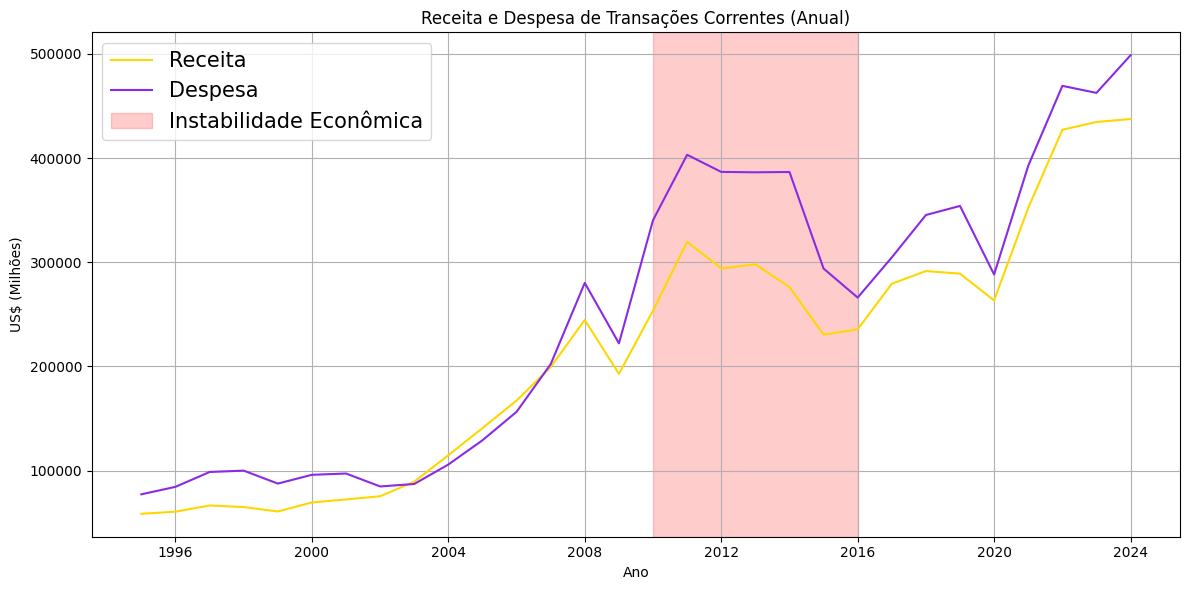

In [8]:
DIFERENCA_RECEITA_DESPESA = {
    'tc_receita': 23462,
    'tc_despesa': 23463
}


tc_despesa_receita = sgs.get(DIFERENCA_RECEITA_DESPESA)
tc_despesa_receita

df_rd = pd.DataFrame(tc_despesa_receita)
df_rd['diff'] = df_rd['tc_receita'] - df_rd['tc_despesa']

plt.figure(figsize=(12, 6))
plt.plot(df_rd.index, df_rd['tc_receita'], label='Receita', color=COLOR_GRAPHS_GOLD)
plt.plot(df_rd.index, df_rd['tc_despesa'], label='Despesa', color=COLOR_GRAPHS_BLUEVIOLET)
plt.axvspan(pd.Timestamp('2010-01-01'), pd.Timestamp('2015-12-31'), color='red', alpha=0.2, label='Instabilidade Econômica')

plt.title('Receita e Despesa de Transações Correntes (Anual)')
plt.xlabel('Ano')
plt.ylabel('US$ (Milhões)')
plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

**exp/imp exportação é maior que importação o resultado é > 1, caso contrário temos uma relação
onde a importação é maior que a exportação.**

* 1. seja temos a relação onde > 1 Superávit comercial (exporta mais que importa)

* 2.  outro caso, temos a relação < 1 Déficit Comercial (importa mais do que exporta)

* 3. ou Exportação = Importação (Balanço Neutro) 


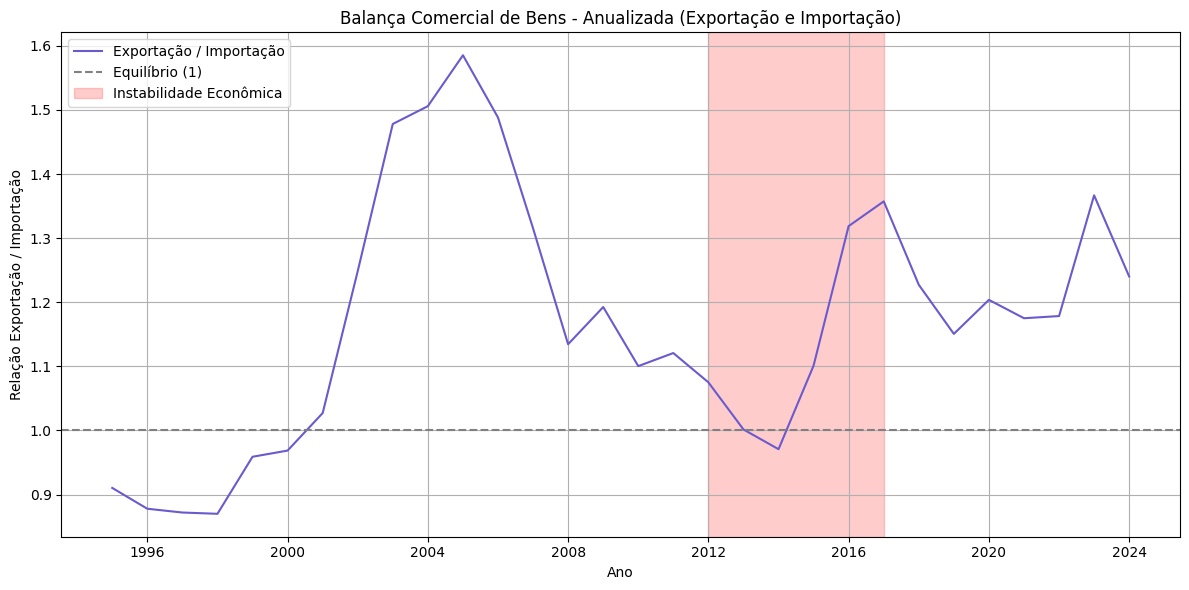

In [9]:
BALANCA_COMERCIAL = {
    'BALANCA_COMERCIAL': 23467,
    'EXPORTACAO_BENS': 23468,
    'IMPORTACAO_BENS': 23469
}

balanca_comercial = sgs.get(BALANCA_COMERCIAL)
df_bc = pd.DataFrame(balanca_comercial)

df_bc['exp/imp'] = df_bc['EXPORTACAO_BENS'] / df_bc['IMPORTACAO_BENS']


plt.figure(figsize=(12, 6))
plt.plot(df_bc.index, df_bc['exp/imp'], label='Exportação / Importação', color=COLOR_GRAPHS_SLATEBLUE)
plt.axhline(1, color='gray', linestyle='--', label='Equilíbrio (1)')

plt.axvspan(pd.Timestamp('2012-01-01'), pd.Timestamp('2016-12-31'), color='red', alpha=0.2, label='Instabilidade Econômica')

plt.title('Balança Comercial de Bens - Anualizada (Exportação e Importação)')
plt.xlabel('Ano')
plt.ylabel('Relação Exportação / Importação')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**RECEITA/DESPESA temos a relação que mede o quanto o balanço de serviços no brasil é afetada pela forte despesa com serviços, que pega as seguintes relações**

* 1. REC/DESP > 1 Temos o superavit (Brasil recebe mais do que gasta com serviços)
* 2. REC/DESP < 1 Temos o Deficit (Brasil gasta mais do que recebe em serviços)
* 3. REC/DESP =1  Equílibrio

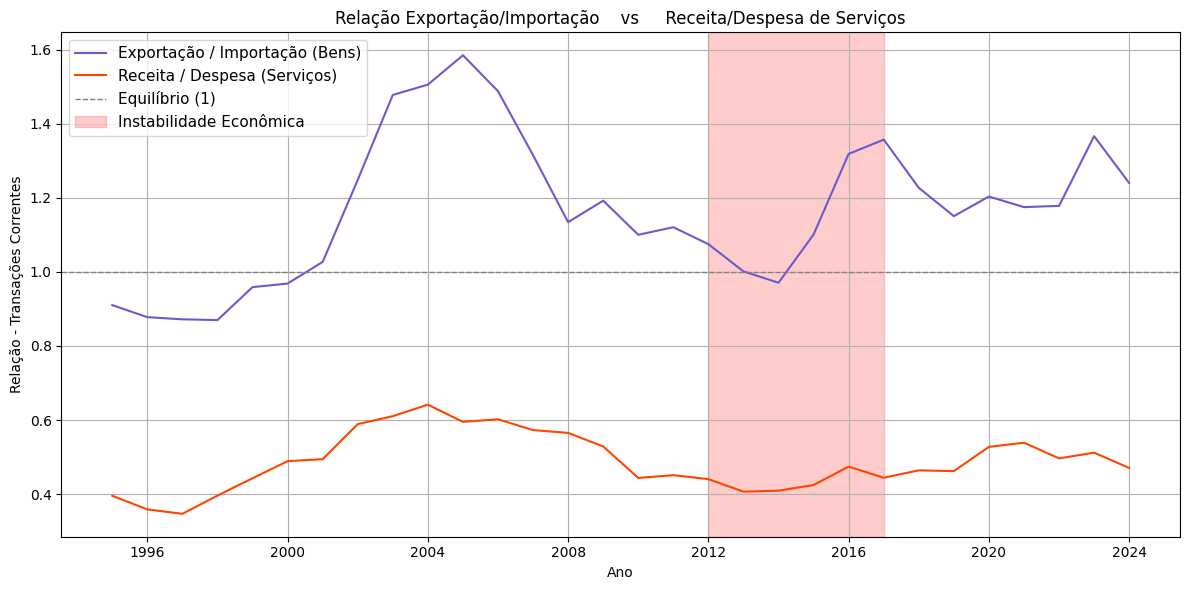

In [10]:
BALANCA_SERVICOS = {
    'RECEITA_SERVICOS': 23480,
    'DESPESA_SERVICOS': 23481,
    'LIQUIDO_SERVICOS': 23479
}

balanca_servicos = sgs.get(BALANCA_SERVICOS)
df_bs = pd.DataFrame(balanca_servicos)
df_bs['rec/desp'] = df_bs['RECEITA_SERVICOS'] / df_bs['DESPESA_SERVICOS']
df_bs

plt.figure(figsize=(12, 6))

plt.plot(df_bc.index, df_bc['exp/imp'], label='Exportação / Importação (Bens)', color=COLOR_GRAPHS_SLATEBLUE)
plt.plot(df_bs.index, df_bs['rec/desp'], label='Receita / Despesa (Serviços)', color=COLOR_GRAPHS_ORANGERED)

plt.axhline(1, color='gray', linestyle='--', linewidth=1, label='Equilíbrio (1)')
plt.axvspan(pd.Timestamp('2012-01-01'), pd.Timestamp('2016-12-31'), color='red', alpha=0.2, label='Instabilidade Econômica')


plt.title('Relação Exportação/Importação    vs     Receita/Despesa de Serviços')
plt.xlabel('Ano')
plt.ylabel('Relação - Transações Correntes')
plt.legend(loc='upper left', fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()

**O gráfico acima, consegue mostrar a relação de Deficit na questão de relação no balanço comercial de Serviços**

* Conseguimos analisar que é um grande dependente por importação de serviços externos
* Mesmo com período de crise, o Brasil tem uma baixa variância na instabilidade Econômica.

* O que trás numa perspectiva mais macro, uma queda brusca na questão de bens na balança comercial. Mas por outro lado, ainda se mantendo com baixa variância a questão de serviços do setor do externo, (forte dependência).


In [11]:
RECEITA_PRIMARIA_E_SECUNDARIA = {
    'RENDA_PRIMARIA_LIQUIDA': 23560, 
    'RENDA_PRIMARIA_RECEITA': 23561,
    'RENDA_PRIMARIA_DESPESA': 23562,
    'RENDA_SECUNDARIA_LIQUIDA': 23598,
    'RENDA_SECUNDARIA_RECEITA': 23599,
    'RENDA_SECUNDARIA_DESPESA': 23600,
}

df_rpc = pd.DataFrame(sgs.get(RECEITA_PRIMARIA_E_SECUNDARIA))

**Renda primária e renda secundaria**

*Renda primaria e renda secundária são conceitos fundamentais em economia, especialmente no contexto de contas nacionais e do balanço de pagamentos.*

- A renda primária refere-se ao pagamento por participação no processo produtivo, como salário, juros e lucros.

- A renda secundária, que era conhecida como transferências unilaterias, envolve distribuição de renda entre países, como transferência pessoais e ajuda oficial ao desenvolvimento. Como impostos benefícios sociais, remessas internacionais.



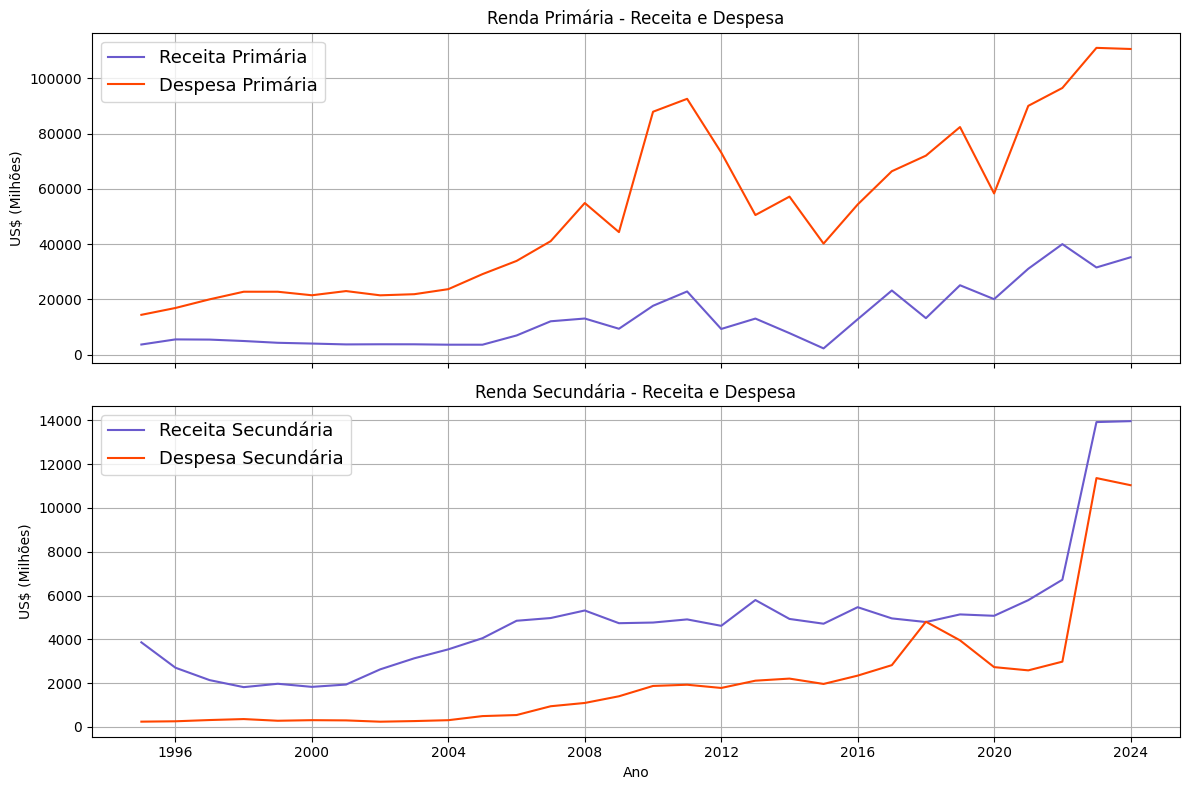

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(df_rpc.index, df_rpc['RENDA_PRIMARIA_RECEITA'], color=COLOR_GRAPHS_SLATEBLUE, label='Receita Primária')
ax1.plot(df_rpc.index, df_rpc['RENDA_PRIMARIA_DESPESA'], color=COLOR_GRAPHS_ORANGERED, label='Despesa Primária')
ax1.set_ylabel('US$ (Milhões)')
ax1.set_title('Renda Primária - Receita e Despesa')
ax1.grid(True)
ax1.legend(loc='upper left', fontsize=13)

ax2.plot(df_rpc.index, df_rpc['RENDA_SECUNDARIA_RECEITA'], color=COLOR_GRAPHS_SLATEBLUE, label='Receita Secundária')
ax2.plot(df_rpc.index, df_rpc['RENDA_SECUNDARIA_DESPESA'], color=COLOR_GRAPHS_ORANGERED, label='Despesa Secundária')
ax2.set_ylabel('US$ (Milhões)')
ax2.set_title('Renda Secundária - Receita e Despesa')
ax2.grid(True)
ax2.legend(loc='upper left', fontsize=13)

plt.xlabel('Ano')
plt.tight_layout()
plt.show()

Thats it 